<a href="https://colab.research.google.com/github/obcarr24/My-Repository/blob/main/Exoplanet_(Transit_Method)_Practice_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as ac
import astropy.units as u

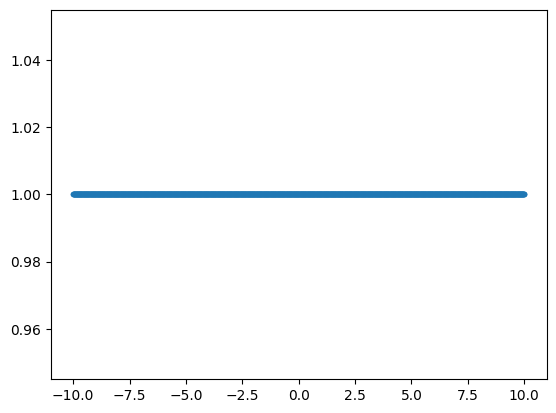

In [9]:
time_arr = np.arange(-10, 10,0.01) * u.hour
flux_arr = np.zeros(np.shape(time_arr)) + 1.0
plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".")

In [10]:
tau = 2.0 * u.hour
t_0 = 1.0 * u.hour
time_start = t_0 - (tau/2)
time_end = t_0 + (tau/2)
print(time_start, time_end)

0.0 h 2.0 h


In [11]:
for i in range(len(time_arr)):
  if i < 10:
    print ("index =", i, "value = ", time_arr[i])

index = 0 value =  -10.0 h
index = 1 value =  -9.99 h
index = 2 value =  -9.98 h
index = 3 value =  -9.97 h
index = 4 value =  -9.96 h
index = 5 value =  -9.950000000000001 h
index = 6 value =  -9.940000000000001 h
index = 7 value =  -9.930000000000001 h
index = 8 value =  -9.920000000000002 h
index = 9 value =  -9.910000000000002 h


In [12]:
ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
print (ind, time_arr[ind])

(array([1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011,
       1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022,
       1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033,
       1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044,
       1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055,
       1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066,
       1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077,
       1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088,
       1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110,
       1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121,
       1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 1

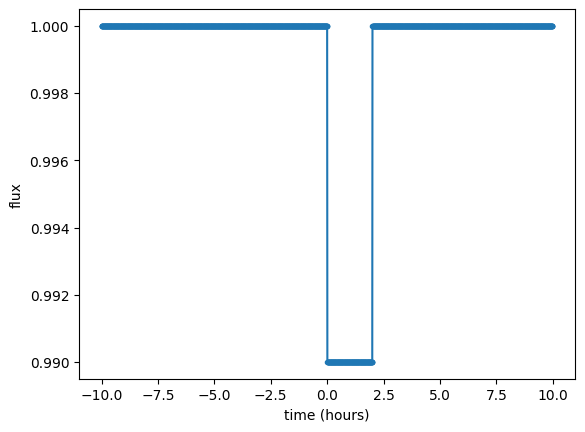

In [13]:
delta = 0.01
flux_arr[ind] = 1.0 - delta
plt.plot(time_arr, flux_arr, linestyle = "-", marker = ".")
plt.xlabel ("time (hours)")
plt.ylabel ("flux")
plt.show()

In [14]:
def generate_transit_lightcurve(time_arr, t_0, tau, delta ):
  flux_arr = np.zeros(np.shape(time_arr))+1.0
  time_start = t_0 - (tau/2)
  time_end = t_0 + (tau/2)
  ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
  flux_arr[ind] = 1.0 - delta
  return flux_arr

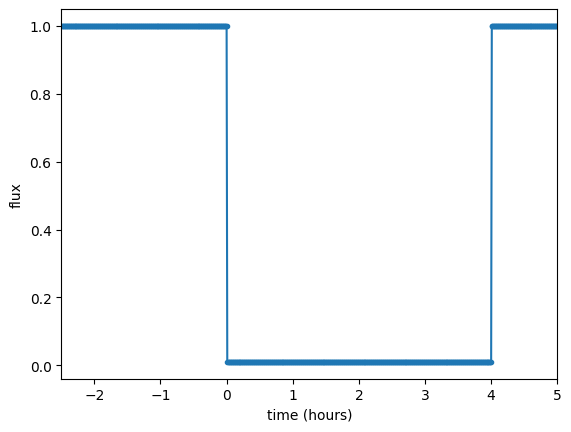

In [15]:
time_arr = np.arange(-10, 10, 0.01) * u.hour
tau = 4.0 * u.hour
t_0 = 2.0 * u.hour
delta = 0.99

flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta)

plt.plot(time_arr, flux_arr, linestyle = "-", marker = ".")
plt.xlabel ("time (hours)")
plt.ylabel ("flux")
plt.xlim(-2.5,5.0)
plt.show()

In [16]:
from google.colab import files # imports the files module that provides the functions to interact with files in COLAB
uploaded = files.upload() # calls the upload function.

Saving gj436b.tbl to gj436b (2).tbl


In [18]:
import astropy.io.ascii # imports the functions that allow colab to read astronomical data.
dat = astropy.io.ascii.read("gj436b.tbl") # Reads the astronomical data from gj436b.tbl

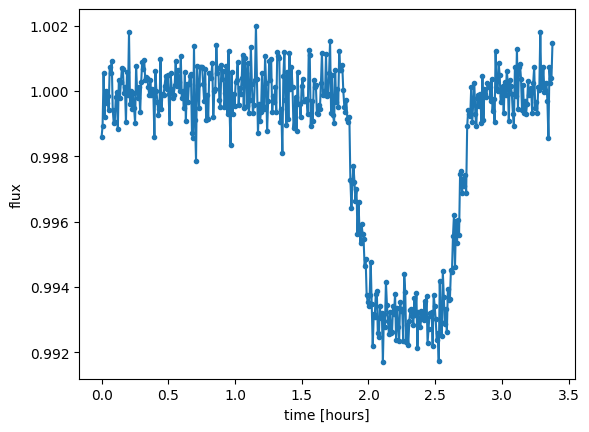

In [19]:
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # converts the time_obs data to hours relative to the first observation.
flux_obs = dat["Relative_Flux"] # Extracts the relative flux column with the observed flux values from the data imported.
plt.plot(time_obs, flux_obs, marker = ".") # Creates a scatter plot given the flux data on the y-axis and time on the x-axis.
plt.xlabel("time [hours]") # labels time on the x-axis.
plt.ylabel("flux") # labels flux on the y-axis.

plt.show()

In [20]:
# Now lets define the parameters for a transit light curve model

t_0 = 2.3 * u.hour # Defines the mid transit time
tau = 0.75 * u.hour # defines the transit duration
delta = 0.007 # Defines the change in brightness the star experiences during transit.
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta) # Generate the model light curve.

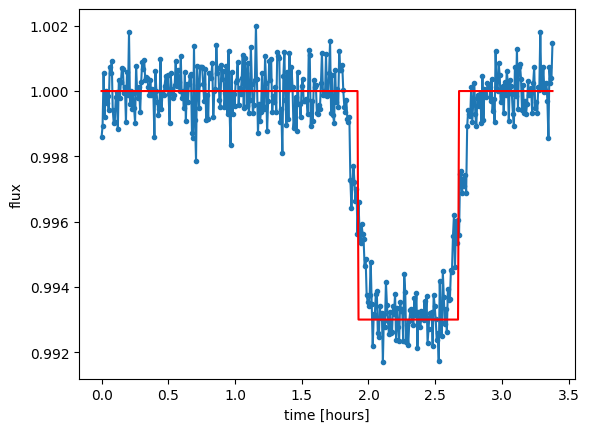

In [21]:
time_obs = dat['HJD']
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # converts the time_obs data to hours relative to the first observation.
flux_obs = dat['Relative_Flux'] # Extracts the relative flux column with the observed flux values from the data imported.
plt.plot(time_obs, flux_obs, marker = ".") # Creates a scatter plot given the flux data on the y-axis and time on the x-axis.
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # plots the model light curve on top of the observed, raw data.
plt.xlabel("time [hours]") # labels time on the x-axis.
plt.ylabel("flux") # labels flux on the y-axis.

plt.show()

In [27]:
num_parameters = 3 # I have 3 parameters: t_0, tau, and delta
flux = flux_obs # Our observed flux
model = flux_model # Our model of the flux
err = np.std(flux_obs-flux_model) # The error/difference between our observed flux and the flux model.


def calculate_reduced_Chi2(flux, model, err, num_parameters): # function that takes the established values above
  degree_freedom = len(flux) - num_parameters #  Calculates the degrees of freedom.
  rChi2 = np.sum((flux - model)**2 / err**2) / degree_freedom # Calculates the reduced chi squared.
  return(rChi2) # Returns the reduced chi squared value.

print("Reduced Chi2 = ", calculate_reduced_Chi2(flux, model, err, 3))

Reduced Chi2 =  1.0068442409769263
